In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import numpy as np

In [2]:
#importing the dataset
data = pd.read_csv('soybean.csv')
display(data.head())

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


In [3]:
# Separate the class (y) from the predictor variables (x)
predictor = data.iloc[:,0:35].values
class_ = data.iloc[:,35].values

In [4]:
#classes of KNN
unique_credito = np.unique(class_)
print(unique_credito)
print(len(unique_credito))

['2-4-d-injury' 'alternarialeaf-spot' 'anthracnose' 'bacterial-blight'
 'bacterial-pustule' 'brown-spot' 'brown-stem-rot' 'charcoal-rot'
 'cyst-nematode' 'diaporthe-pod-&-stem-blight' 'diaporthe-stem-canker'
 'downy-mildew' 'frog-eye-leaf-spot' 'herbicide-injury'
 'phyllosticta-leaf-spot' 'phytophthora-rot' 'powdery-mildew'
 'purple-seed-stain' 'rhizoctonia-root-rot']
19


In [5]:
# Transformation of categorical attributes into numerical attributes, passing the index of each categorical column
label = LabelEncoder()

for i in range(0,35):
    predictor[:,i] = label.fit_transform(predictor[:,i])

display(predictor)

array([[6, 2, 1, ..., 2, 1, 2],
       [2, 2, 1, ..., 2, 1, 2],
       [3, 2, 1, ..., 2, 1, 2],
       ...,
       [4, 1, 0, ..., 0, 0, 3],
       [1, 1, 0, ..., 0, 0, 3],
       [4, 1, 0, ..., 0, 0, 3]], dtype=object)

In [6]:
#Division of dataset into train and test (70% for training and 30% for testing)
x_train, x_test, y_train, y_test = train_test_split(predictor, class_, test_size = 0.4, random_state = 0)

In [7]:
# Create a K Neighbors classifier
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [8]:
#Predict the response for test dataset
prediction = knn.predict(x_test)

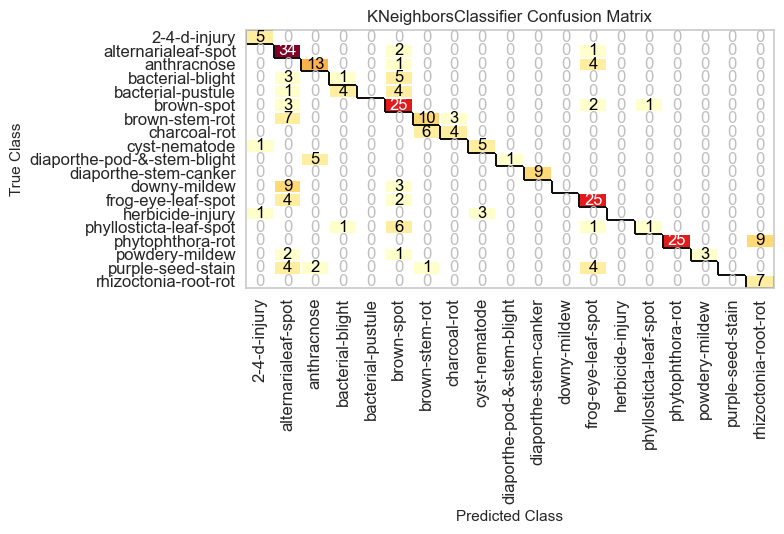

<AxesSubplot: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [9]:
#Display the confusion matrix
conf_image = ConfusionMatrix(KNeighborsClassifier(n_neighbors = 19))
conf_image.fit(x_train, y_train)
conf_image.score(x_test, y_test)
conf_image.poof()

In [10]:
#Calculate the accuracy of the model
ACC = accuracy_score(y_test, prediction)
print(f"Accuracy: {ACC*100:.1f} %")

Accuracy: 61.3 %


In [12]:
# Use of the ExtraTreesClassifier algorithm to extract the most important characteristics
forest = ExtraTreesClassifier()
forest.fit(x_train, y_train)
importances = forest.feature_importances_
importances

array([0.04858538, 0.02143865, 0.03423572, 0.03183123, 0.02587659,
       0.02130693, 0.03178135, 0.03064863, 0.01812787, 0.01635996,
       0.03024204, 0.01372163, 0.04222575, 0.05202064, 0.05164643,
       0.02879542, 0.01461187, 0.0306223 , 0.03514168, 0.00888222,
       0.03393381, 0.0370308 , 0.03395944, 0.03319197, 0.00668872,
       0.0312092 , 0.01649239, 0.05933824, 0.03253847, 0.02649356,
       0.01818569, 0.02274782, 0.03020795, 0.01073147, 0.0191482 ])

In [28]:
# Sorting the list
big = list(set(importances))
big.sort()

#Define the number of features to be used in model construction
n = 25

# Finding the biggest importances
best_importances = []
for i in range(1,n+1):
    print(big[-i])
    big_index = np.where(importances == big[-i])
    best_importances.append(big_index[0][0])

print(best_importances)
print(data.columns[best_importances])

0.059338240980662274
0.05202064471796757
0.05164642658407957
0.048585380788471806
0.04222575340592956
0.037030795359901565
0.03514168299685058
0.03423571620823862
0.03395944178112955
0.0339338072502852
0.033191970785965
0.03253846880470201
0.03183122713981704
0.03178134619596425
0.031209198164449132
0.03064863197361868
0.03062229545073967
0.030242038281412583
0.030207953923223427
0.028795420055387492
0.02649356330319221
0.025876585330527887
0.022747815671806428
0.021438646298274217
0.021306931375084628
[27, 13, 14, 0, 12, 21, 18, 2, 22, 20, 23, 28, 3, 6, 25, 7, 17, 10, 32, 15, 29, 4, 31, 1, 5]
Index(['fruit-pods', 'leafspots-marg', 'leafspot-size', 'date',
       'leafspots-halo', 'canker-lesion', 'stem', 'precip', 'fruiting-bodies',
       'stem-cankers', 'external-decay', 'fruit-spots', 'temp', 'area-damaged',
       'int-discolor', 'severity', 'leaf-mild', 'plant-growth', 'seed-size',
       'leaf-shread', 'seed', 'hail', 'seed-discolor', 'plant-stand',
       'crop-hist'],
      dt

In [29]:
# Creation of a new database using only the most important attributes
x_train2 = x_train[:,best_importances]
x_test2 = x_test[:,best_importances]

In [30]:
# Create another model with reduced database, training and obtaining predictions
knn2 = KNeighborsClassifier(n_neighbors = 19)
knn2.fit(x_train2, y_train)
prediction2 = knn2.predict(x_test2)

In [31]:
#Calculate the accuracy of the new model
ACC2 = accuracy_score(y_test, prediction2)
print(f"Accuracy: {ACC2*100:.1f} %")

Accuracy: 63.5 %


In [32]:
#summary of the results
if ACC2 > ACC:
    print(f'The attribute selection improved the accuracy of the model : {ACC*100:.1f} --> {ACC2*100:.1f} %' )
else:
    print(f'The attribute selection did not improve the accuracy of the model : {ACC*100:.1f} --> {ACC2*100:.1f} %' )

The attribute selection improved the accuracy of the model : 61.3 --> 63.5 %
